In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

# Image color extraction using Scikit Learn¶
We'll see how simple it is to identify the most important colors in an image using the K Means, unsupervised ML model from the Scikit Learn package.

# Step 1: Define some meta variables
You can play around with the following variables to generate different results. CLUSTERS is probably the most important one, as it defines the number of colors we'll extract from the image.

In [29]:
PATH = './Desktop/Django/sada.jpg'
WIDTH = 360
HEIGHT = 360
CLUSTERS = 6

# Step 2: Open the image using Pillow

In [30]:
image = Image.open(PATH)
image.size

(960, 960)

In [31]:
print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH) / 1024, d=image.size))

Loaded JPEG image. Size: 126.86 KB. Dimensions: ((960, 960))


# Step 3: Resize image

In [32]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [33]:
calculate_new_size(image)

(360, 360)

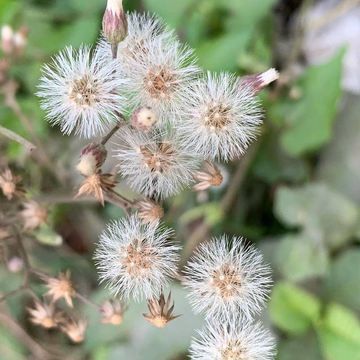

In [34]:
new_width, new_height = calculate_new_size(image)
image.resize((new_width, new_height), Image.ANTIALIAS)

In [35]:
image = image.resize((new_width, new_height), Image.ANTIALIAS)

# Step 4: Creating the numpy arrays¶

In [36]:
img_array = np.array(image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

# Step 5: Create the model and train it

In [37]:
model = KMeans(n_clusters=CLUSTERS)
labels = model.fit_predict(img_vector)
label_counts = Counter(labels)
total_count = sum(label_counts.values())

In [38]:
hex_colors = [
    rgb2hex(center) for center in model.cluster_centers_
]
hex_colors

['#9da58b', '#62684c', '#c0bcb3', '#363d24', '#dfdddc', '#7e8e69']

In [39]:
list(zip(hex_colors, list(label_counts.values())))

[('#9da58b', 31886),
 ('#62684c', 22114),
 ('#c0bcb3', 10534),
 ('#363d24', 21213),
 ('#dfdddc', 17879),
 ('#7e8e69', 25974)]

# Final result

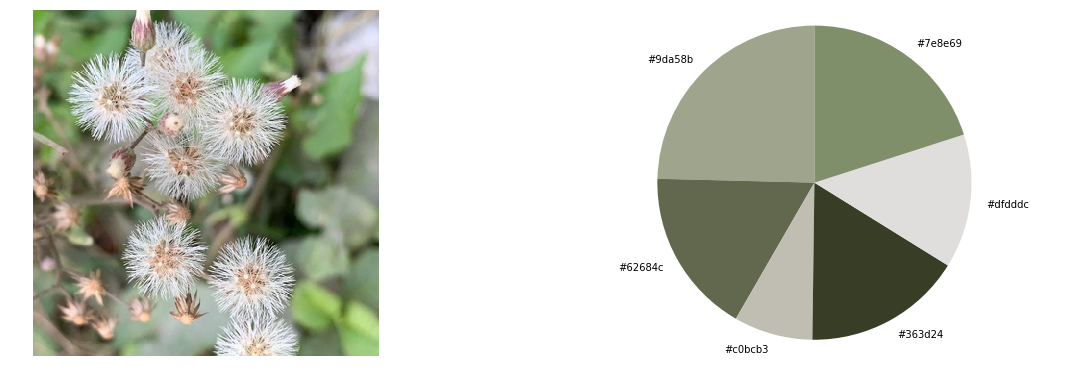

In [40]:
plt.figure(figsize=(20, 14))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()

In [41]:
i = Image.open(PATH)

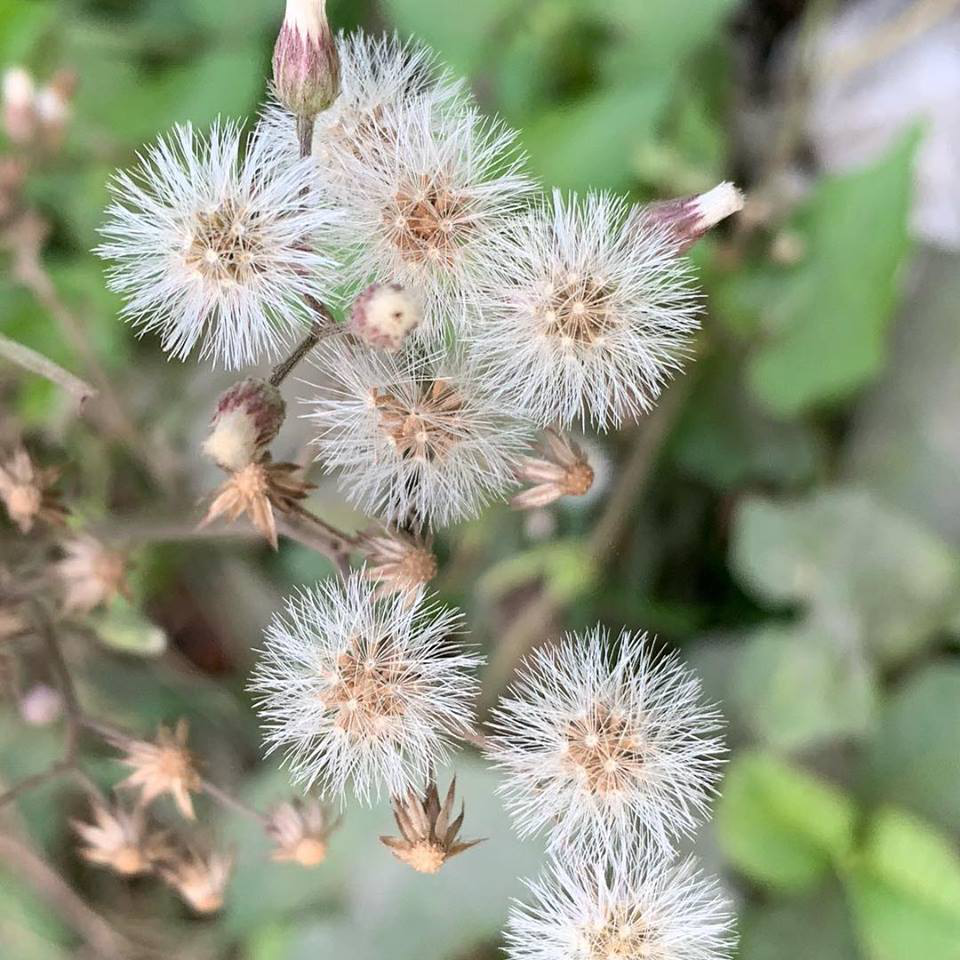

In [42]:
i